## Problem Statement
Customer Analysis is a detailed analysis of a company’s customers. It helps a business to 
better understand its customers and makes it easier for them to modify products according 
to the specific needs, behaviours and concerns of different types of customers. Customer 
analysis helps a business to modify its product based on its target customers from different 
types of customer segments. For example, instead of spending money to market a new 
product to every customer in the company’s database, a company can analyze which 
customer segment is most likely to buy the product and then market the product only on that 
particular segment

In [ ]:
## Data Dictionary 
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
Perform clustering to summarize customer segments

In [137]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Target
Need to perform clustering to summarize customer segments.

In [138]:
#Loading the dataset
data2 = pd.read_csv("customer_data.csv")

data2.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    04/09/12       58       635  ...                  7             0   
1    08/03/14       38        11  ...                  5             0   
2    21/08/13       26       426  ...                  4             0   
3    10/02/14       26        11  ...                  6             0   
4    19/01/14       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Exploratory Data Analysis

In [139]:

data2.shape

(2240, 29)

In [140]:
data2['ID'].nunique()
# all customers id are unique. One row correcponds to one record

2240

In [141]:
print(f'Number of duplicated rows:{data2.duplicated().sum()}')

Number of duplicated rows:0


In [142]:
data2.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [143]:
data2.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [144]:
data2.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [145]:
#Information on features 
data2.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    04/09/12    

In [146]:
data2.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [147]:
data2['Customer_Age'] = datetime.now().year - data2['Year_Birth']
data2[['ID','Year_Birth','Customer_Age']].head()

ID  Year_Birth  Customer_Age
0  5524        1957            66
1  2174        1954            69
2  4141        1965            58
3  6182        1984            39
4  5324        1981            42

### Data Visualisation

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

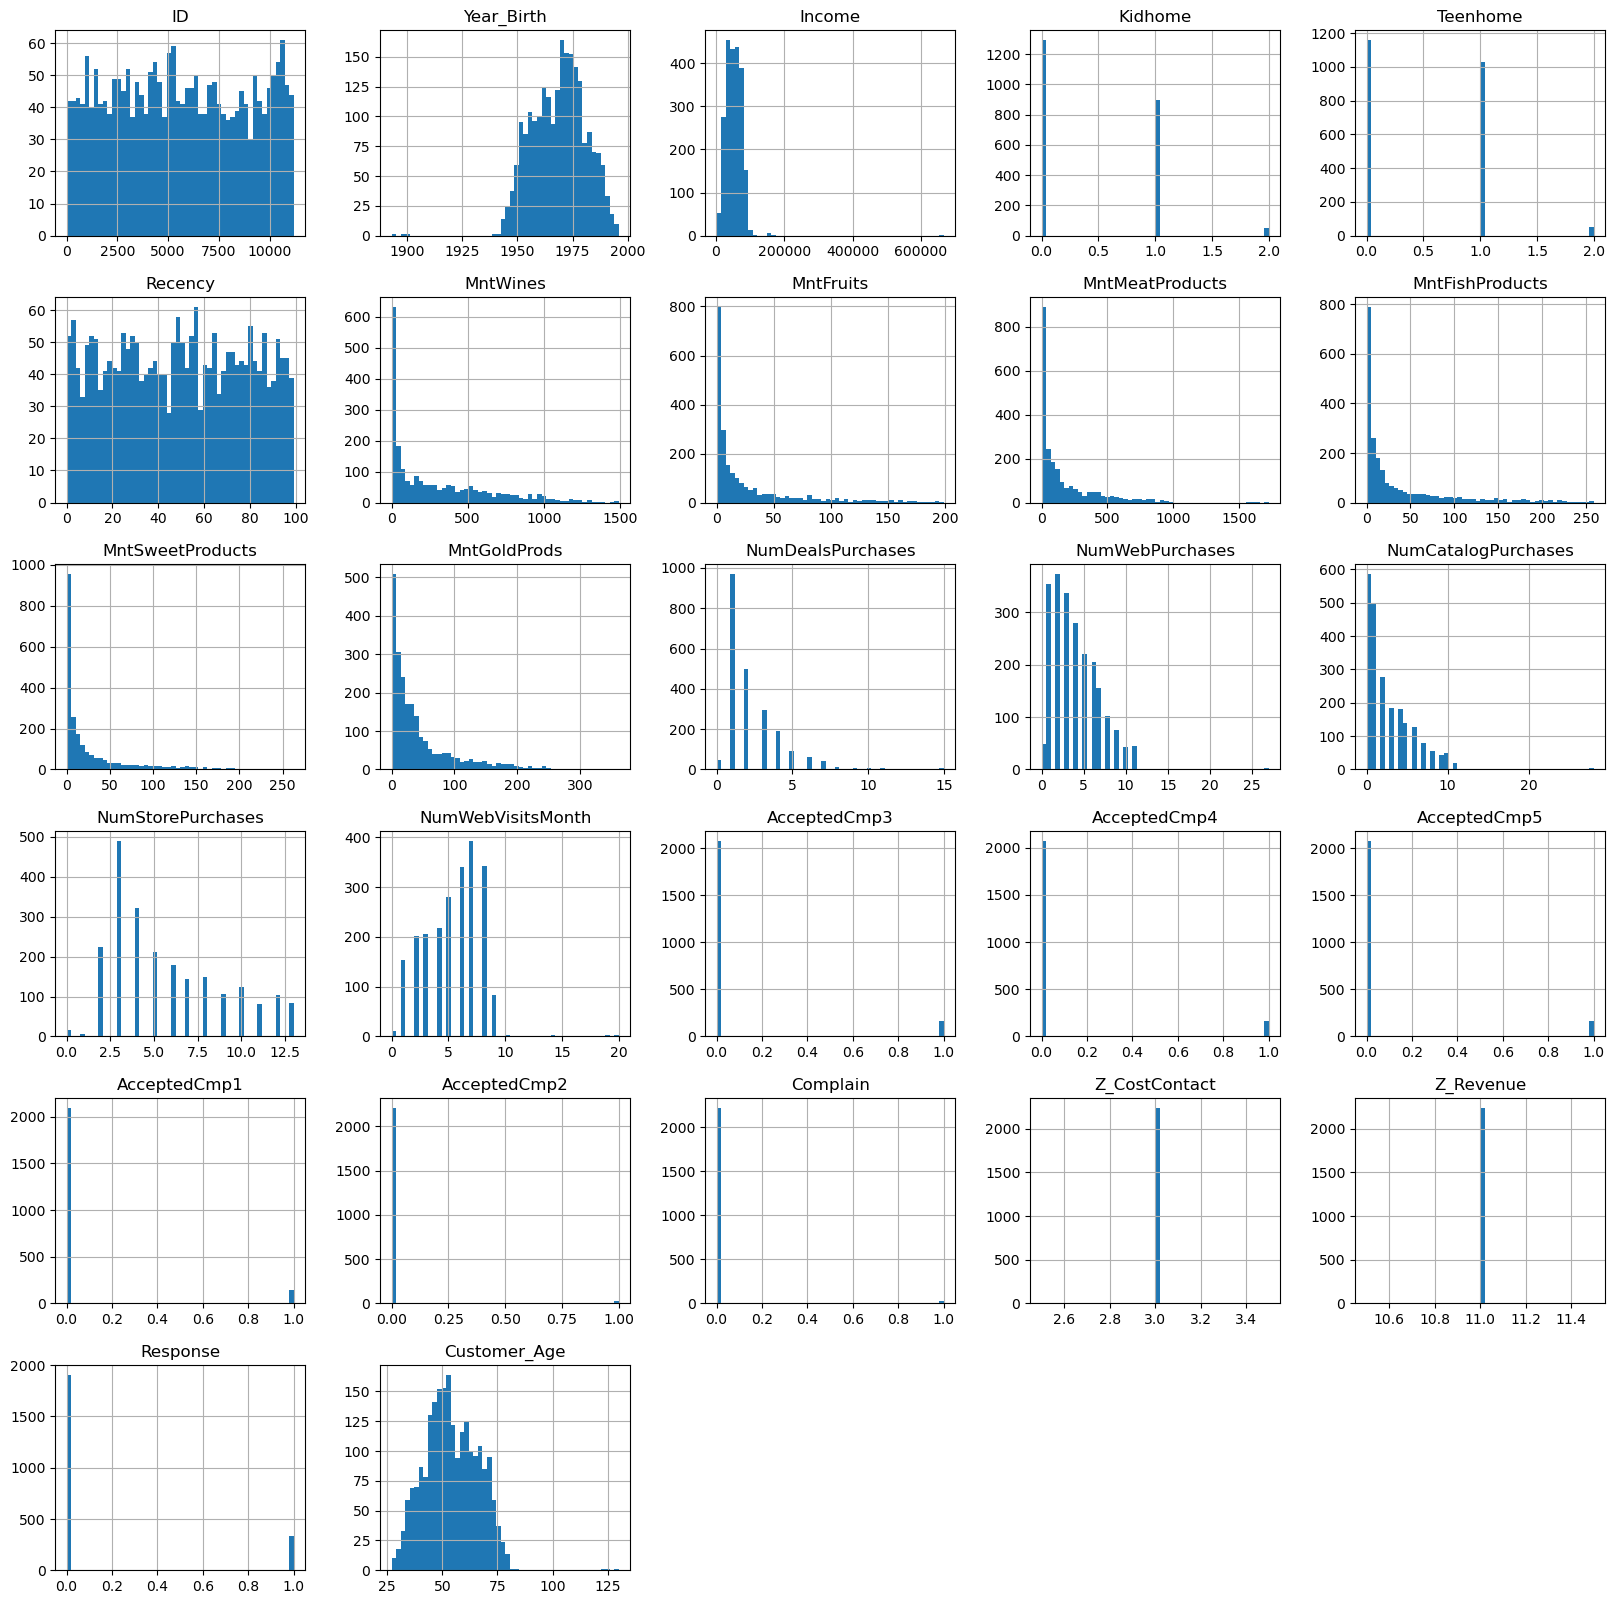

In [148]:
data2.hist(figsize=(20,20), bins=50)

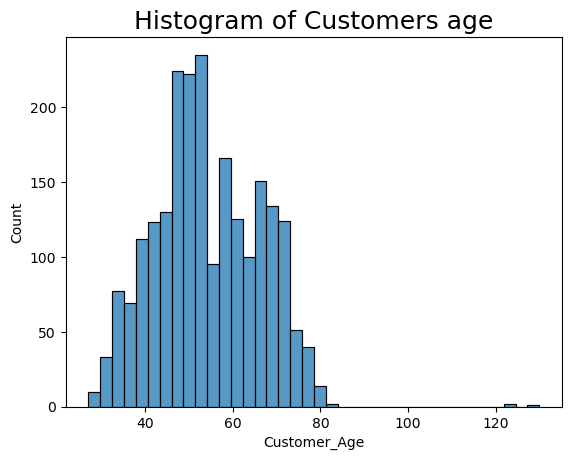

In [149]:
sns.histplot(data2.Customer_Age)
plt.title('Histogram of Customers age', fontsize=18)
plt.show()

In [154]:
#There are some customers whose age is recorded as more than 120 years. It is important to examine these records as they 
#might be erroneous entries or mistakes. Unless the owner of the dataset confirms the validity of such age values, it would
#be appropriate to drop these records from the dataset. Age values exceeding 120 are highly unlikely and do not
#make logical sense in most cases.

In [155]:

data2.query('Customer_Age>100')

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192    26/09/13       99        15  ...             0             0   
239    17/05/14       23         8  ...             0             0   
339    26/09/13       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Customer_Age  
192         11         0           123  
239         11         0           130  
339         11         0           124  

[3 rows x 30 columns]

In [156]:
#Even the amount of money they spend on groups of products look unusual. Customer ID 7829 spent 6dollars on fruits, 8 on
#meat and 4 on sweets in the last 2 years in 5 transactions.I'll drop those records from the datase

SyntaxError: invalid syntax (2393100442.py, line 1)

In [157]:
customer_ids_to_drop = [7829, 11004, 1150]
data2 = data2[~data2['ID'].isin(customer_ids_to_drop)]

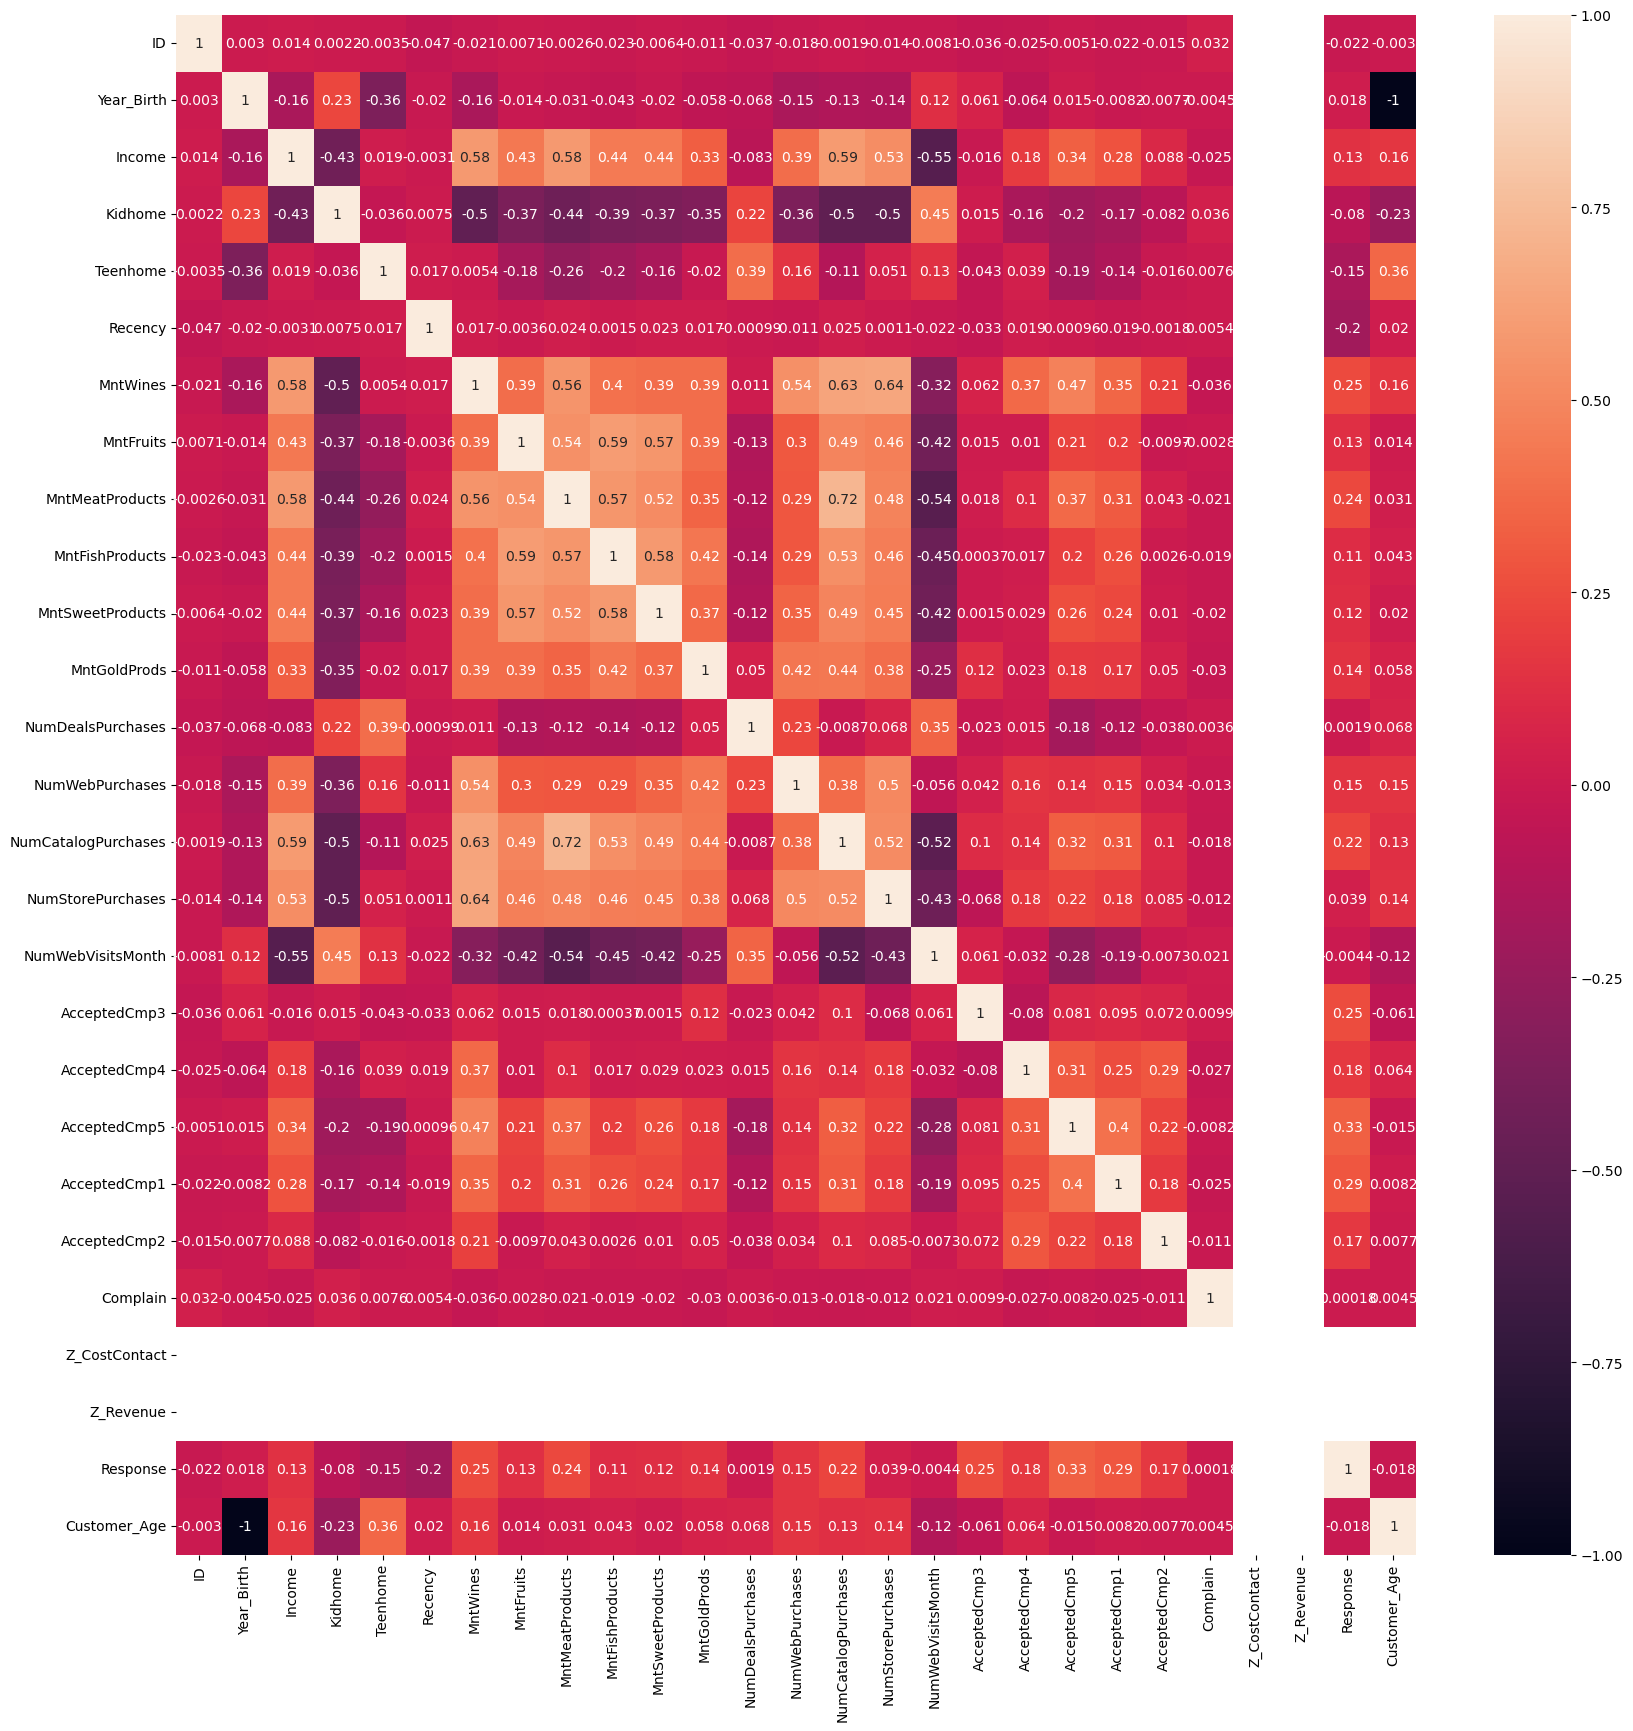

In [158]:
plt.figure(figsize=(20,20))  
sns.heatmap(data2.corr(),annot=True)
plt.show()

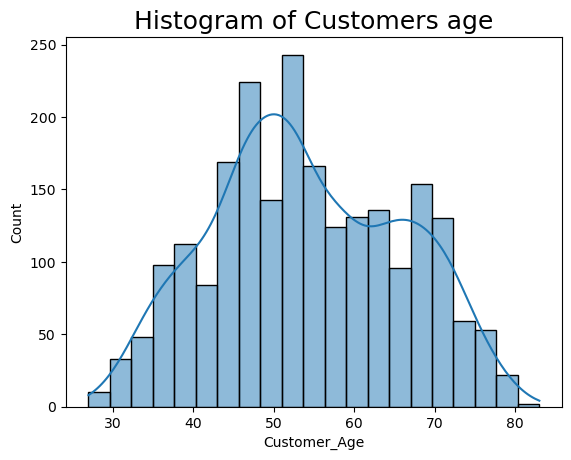

In [159]:
sns.histplot(data2.Customer_Age, kde=True)
plt.title('Histogram of Customers age', fontsize=18)
plt.show()

In [160]:
#drop ultra high income record
customer_ids_to_drop = [9432]
data2 = data2[~data2['ID'].isin(customer_ids_to_drop)]

In [162]:
data2['Education'].value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

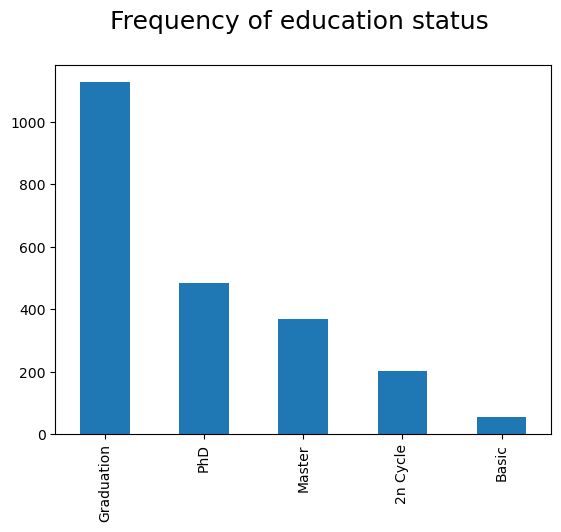

In [163]:
data2['Education'].value_counts().plot(kind='bar',linewidth = 3)
plt.title("Frequency of education status \n",fontsize=18)
# plt.grid(True)
plt.show()

In [1]:
#labeencoder

In [164]:
le = LabelEncoder()
data2['Education_encoded'] = le.fit_transform(data2['Education'])
data2.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0    04/09/12       58       635  ...             0             0   
1    08/03/14       38        11  ...             0             0   
2    21/08/13       26       426  ...             0             0   
3    10/02/14       26        11  ...             0             0   
4    19/01/14       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Customer_Age  Education_encoded  
0            66                  2  
1            69                  2  
2            58                  2  
3            39                  2  
4            42                  4  

[5 rows x 31 columns]

In [165]:
data2['Marital_Status'].value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [166]:
data2['Marital_Status'] = data2["Marital_Status"].replace({"Married":1, "Together":1, "Single":0, "Divorced":0, "Widow":0, "Alone":0, "Absurd":0, "YOLO":0})
data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0    04/09/12       58       635  ...             0             0   
1    08/03/14       38        11  ...             0             0   
2    21/08/13       26       426  ...             0             0   
3    10/02/14       26        11  ...             0             0   
4    19/01/14       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Customer_Age  Education_encoded  
0            66                  2  
1            69                  2  
2            58                  2  
3            39                  2  
4            42                  4  

[5 rows x 31 columns]

In [167]:
data2['Marital_Status'].value_counts()

1    1442
0     794
Name: Marital_Status, dtype: int64

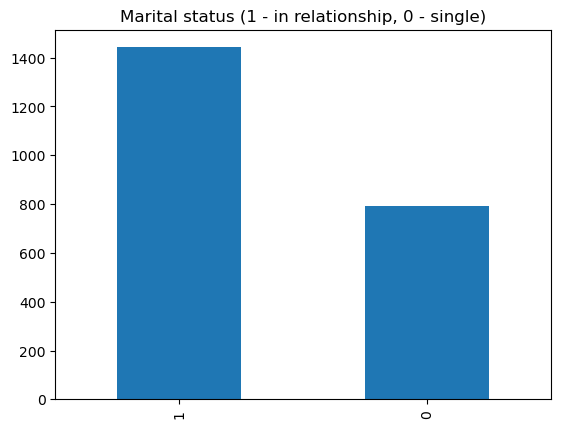

In [168]:
data2['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital status (1 - in relationship, 0 - single)')
plt.show()

In [169]:
data2['Income']=data2['Income'].fillna(data2['Income'].median())
print(f'Number of missing datapoints: {data2["Income"].isnull().sum()}')

Number of missing datapoints: 0


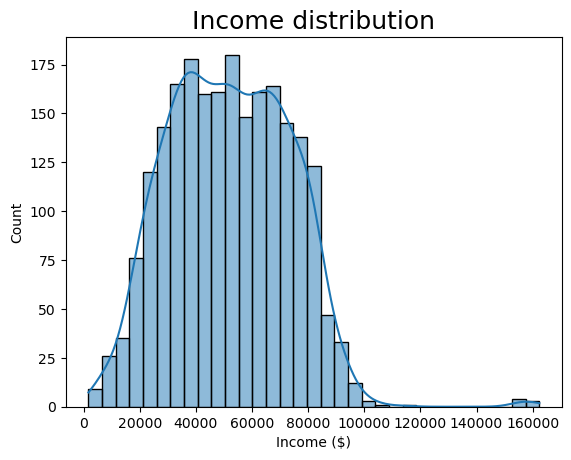

In [170]:
sns.histplot(data2['Income'], kde=True)
plt.title('Income distribution', fontsize=18)
plt.xlabel('Income ($)')
plt.show()

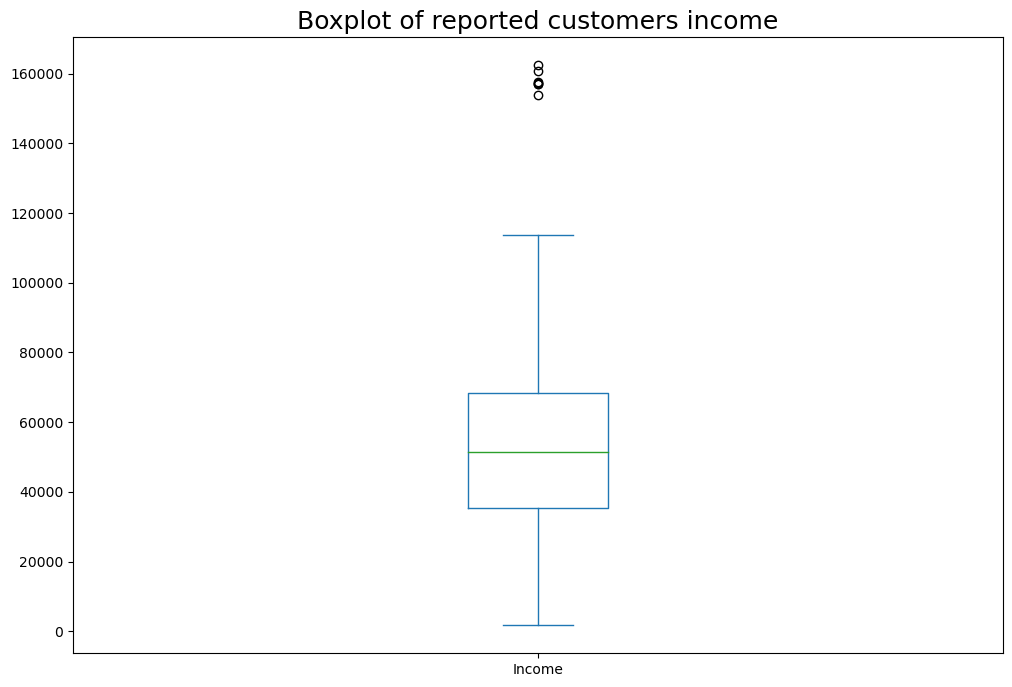

In [171]:
data2["Income"].plot.box(figsize=(12,8))
plt.title('Boxplot of reported customers income', fontsize=18)
plt.show()

In [172]:
#drop ultra high income record
customer_ids_to_drop = [9432]
data2= data2[~data2['ID'].isin(customer_ids_to_drop)]

In [173]:
#data2['Membership_years'] = abs(pd.to_datetime(data2['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year) - datetime.now().year)
#data2.head()

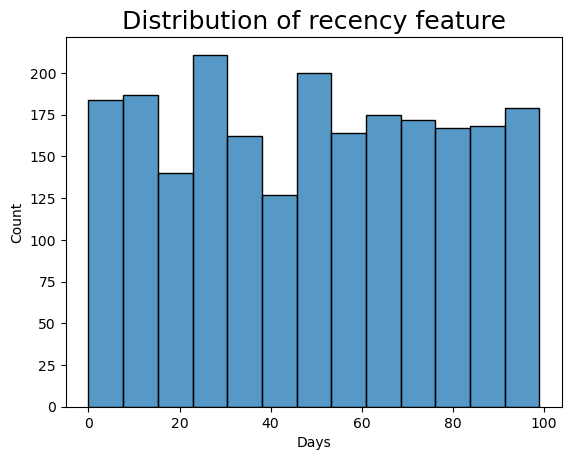

In [174]:
sns.histplot(data2['Recency'])
plt.title('Distribution of recency feature',fontsize=18)
plt.xlabel('Days')
plt.show()


In [175]:
data2['MntTotal'] = data2['MntWines'] + data2['MntFruits'] + data2['MntMeatProducts'] + data2['MntFishProducts'] + data2['MntSweetProducts'] + data2['MntGoldProds']
data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0    04/09/12       58       635  ...             0             0   
1    08/03/14       38        11  ...             0             0   
2    21/08/13       26       426  ...             0             0   
3    10/02/14       26        11  ...             0             0   
4    19/01/14       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Customer_Age  \
0             0         0              3         11         1            66   
1             0         0              3         11         0            69   
2             0         0              3         11         0            58   
3             0         0              3         11         0            39   
4             0         0              3         11         0            42   

   Education_encoded  MntTotal  
0                  2      1617  
1                  2        27  
2                  2       776  
3                  2        53  
4                  4       422  

[5 rows x 32 columns]

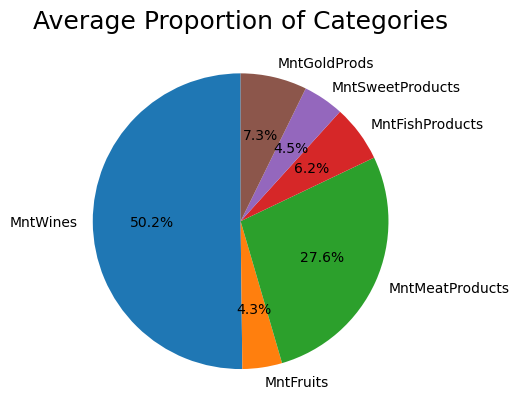

In [176]:
# Calculate the average proportion of each category out of the total
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
totals = data2[categories].sum()
average_proportions = totals / data2['MntTotal'].sum()

fig, ax = plt.subplots()
ax.pie(average_proportions, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Average Proportion of Categories', fontsize=18)
fig.patch.set_facecolor('white')
plt.show()

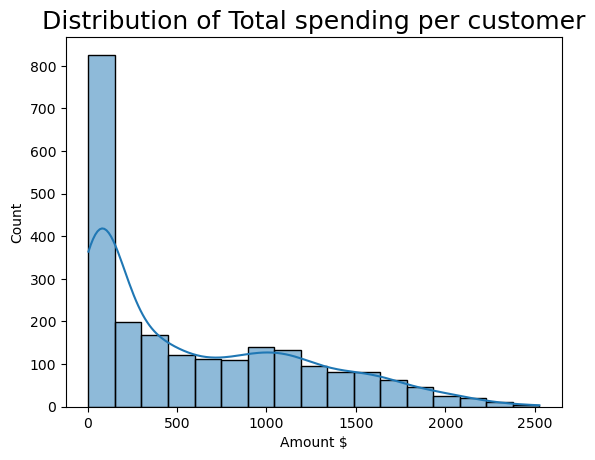

In [177]:
sns.histplot(data2['MntTotal'], kde=True)
plt.title('Distribution of Total spending per customer',fontsize=18)
plt.xlabel('Amount $')
plt.show()

In [178]:
data2['Total_transactions'] = data2['NumWebPurchases'] + data2['NumCatalogPurchases'] + data2['NumStorePurchases']
data2['Average_check'] = round((data2['MntTotal'] / data2['Total_transactions']),2)
data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0    04/09/12       58       635  ...             0         0              3   
1    08/03/14       38        11  ...             0         0              3   
2    21/08/13       26       426  ...             0         0              3   
3    10/02/14       26        11  ...             0         0              3   
4    19/01/14       94       173  ...             0         0              3   

   Z_Revenue  Response  Customer_Age  Education_encoded  MntTotal  \
0         11         1            66                  2      1617   
1         11         0            69                  2        27   
2         11         0            58                  2       776   
3         11         0            39                  2        53   
4         11         0            42                  4       422   

   Total_transactions  Average_check  
0                  22          73.50  
1                   4           6.75  
2                  20          38.80  
3                   6           8.83  
4                  14          30.14  

[5 rows x 34 columns]

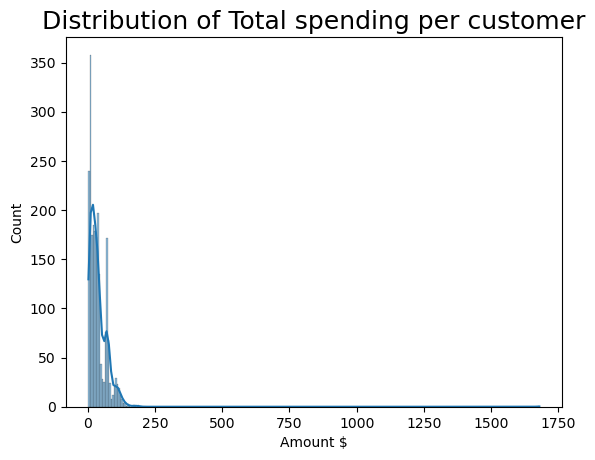

In [179]:
sns.histplot(data2['Average_check'], kde=True)
plt.title('Distribution of Total spending per customer',fontsize=18)
plt.xlabel('Amount $')
plt.show()

In [180]:
data2[data2['Average_check'] >1500]

ID  Year_Birth   Education  Marital_Status    Income  Kidhome  \
655    5555        1975  Graduation               0  153924.0        0   
981    3955        1965  Graduation               0    4861.0        0   
1245   6862        1971  Graduation               0    1730.0        0   
1524  11110        1973  Graduation               0    3502.0        1   
1846   9931        1963         PhD               1    4023.0        1   
2132  11181        1949         PhD               1  156924.0        0   
2228   8720        1978    2n Cycle               1   51371.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
655          0    07/02/14       81         1  ...             0         0   
981          0    22/06/14       20         2  ...             0         0   
1245         0    18/05/14       65         1  ...             0         0   
1524         0    13/04/13       56         2  ...             0         0   
1846         1    23/06/14       29         5  ...             0         0   
2132         0    29/08/13       85         2  ...             0         0   
2228         0    12/08/12       53        32  ...             0         0   

      Z_CostContact  Z_Revenue  Response  Customer_Age  Education_encoded  \
655               3         11         0            48                  2   
981               3         11         0            58                  2   
1245              3         11         0            52                  2   
1524              3         11         0            50                  2   
1846              3         11         0            60                  4   
2132              3         11         0            74                  4   
2228              3         11         0            45                  0   

      MntTotal  Total_transactions  Average_check  
655          6                   0            inf  
981          6                   0            inf  
1245         8                   0            inf  
1524         5                   0            inf  
1846         9                   0            inf  
2132         8                   0            inf  
2228      1679                   1         1679.0  

[7 rows x 34 columns]

In [181]:
customer_ids_to_drop = [8720]
data2 = data2[~data2['ID'].isin(customer_ids_to_drop)]

In [182]:

data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0    04/09/12       58       635  ...             0         0              3   
1    08/03/14       38        11  ...             0         0              3   
2    21/08/13       26       426  ...             0         0              3   
3    10/02/14       26        11  ...             0         0              3   
4    19/01/14       94       173  ...             0         0              3   

   Z_Revenue  Response  Customer_Age  Education_encoded  MntTotal  \
0         11         1            66                  2      1617   
1         11         0            69                  2        27   
2         11         0            58                  2       776   
3         11         0            39                  2        53   
4         11         0            42                  4       422   

   Total_transactions  Average_check  
0                  22          73.50  
1                   4           6.75  
2                  20          38.80  
3                   6           8.83  
4                  14          30.14  

[5 rows x 34 columns]

In [183]:
data2_processed = data2[['Customer_Age','Education_encoded','Marital_Status','Income','MntTotal','Average_check','Kidhome','Teenhome','Recency','NumDealsPurchases','Total_transactions','NumWebVisitsMonth']]
data2_processed.head()

Customer_Age  Education_encoded  Marital_Status   Income  MntTotal  \
0            66                  2               0  58138.0      1617   
1            69                  2               0  46344.0        27   
2            58                  2               1  71613.0       776   
3            39                  2               1  26646.0        53   
4            42                  4               1  58293.0       422   

   Average_check  Kidhome  Teenhome  Recency  NumDealsPurchases  \
0          73.50        0         0       58                  3   
1           6.75        1         1       38                  2   
2          38.80        0         0       26                  1   
3           8.83        1         0       26                  2   
4          30.14        1         0       94                  5   

   Total_transactions  NumWebVisitsMonth  
0                  22                  7  
1                   4                  5  
2                  20                  4  
3                   6                  6  
4                  14                  5

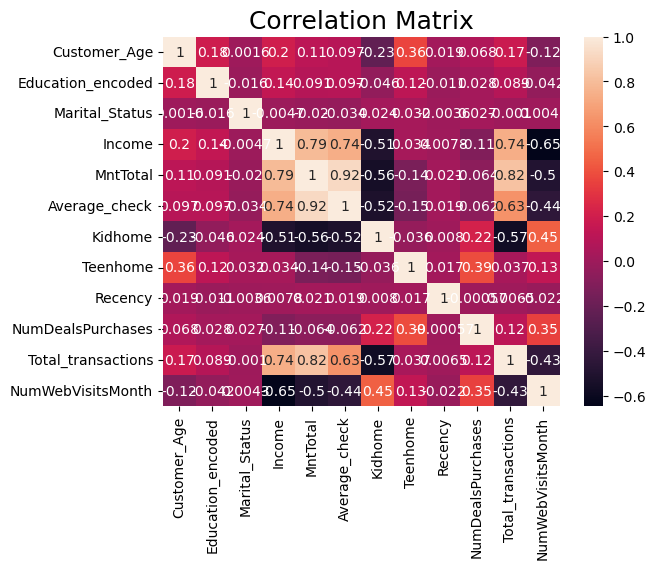

In [184]:
sns.heatmap(data2_processed.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

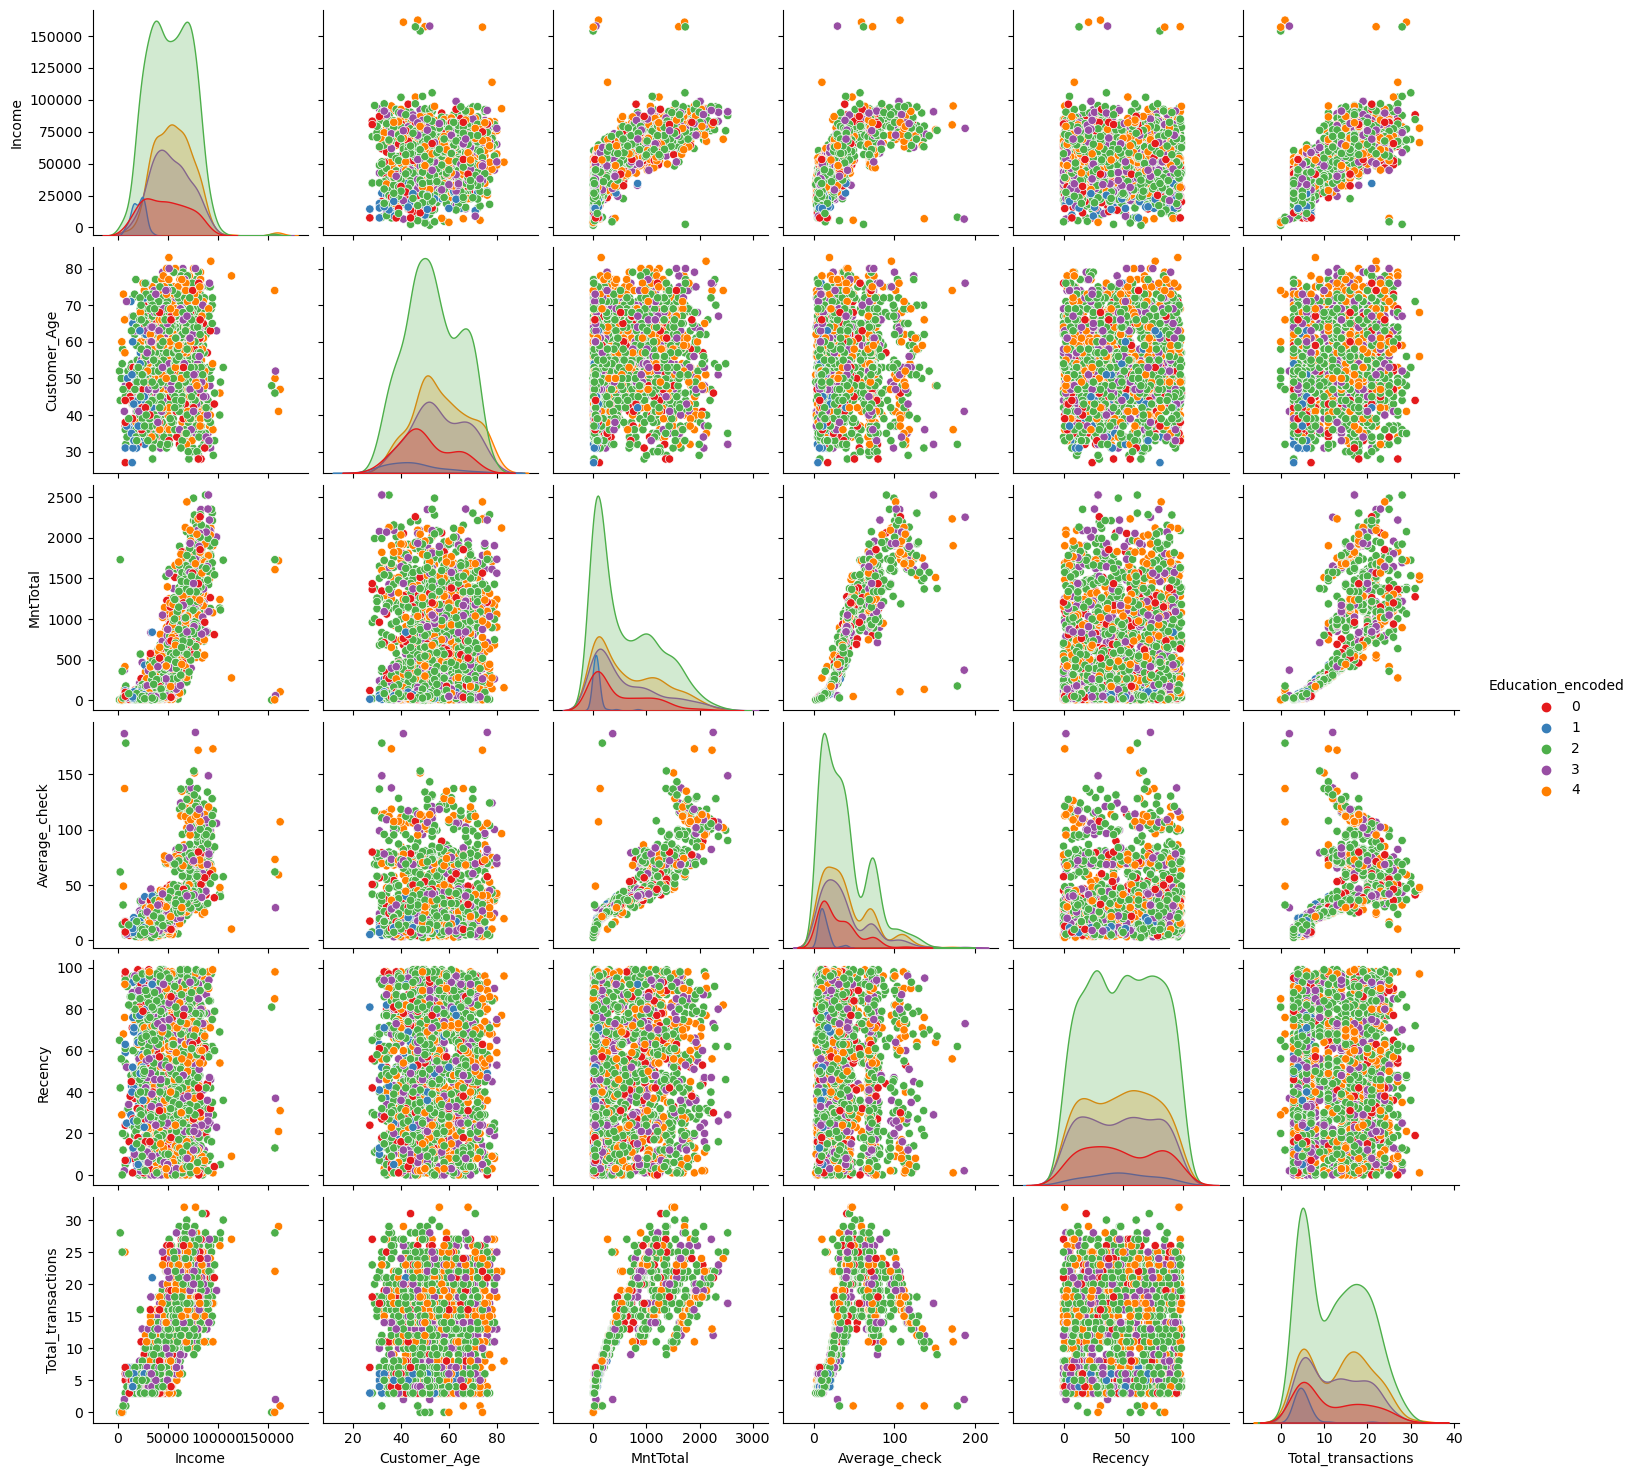

In [185]:
to_plot = ['Income', 'Customer_Age', 'MntTotal', 'Average_check', 'Recency', 'Total_transactions', 'Education_encoded']
sns.pairplot(data2_processed[to_plot], palette='Set1', hue='Education_encoded')
plt.show()

In [186]:
data2['Parent'] = (data2['Kidhome'] + data2['Teenhome']) > 0
data2['Parent'] = data2['Parent'].astype(int)
data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0    04/09/12       58       635  ...         0              3         11   
1    08/03/14       38        11  ...         0              3         11   
2    21/08/13       26       426  ...         0              3         11   
3    10/02/14       26        11  ...         0              3         11   
4    19/01/14       94       173  ...         0              3         11   

   Response  Customer_Age  Education_encoded  MntTotal  Total_transactions  \
0         1            66                  2      1617                  22   
1         0            69                  2        27                   4   
2         0            58                  2       776                  20   
3         0            39                  2        53                   6   
4         0            42                  4       422                  14   

   Average_check  Parent  
0          73.50       0  
1           6.75       1  
2          38.80       0  
3           8.83       1  
4          30.14       1  

[5 rows x 35 columns]

In [187]:
data2_corr = data2[['Marital_Status', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Customer_Age','Education_encoded','Average_check', 'Parent']]
data2_corr.head()

Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0               0  58138.0       635         88              546   
1               0  46344.0        11          1                6   
2               1  71613.0       426         49              127   
3               1  26646.0        11          4               20   
4               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  Customer_Age  \
0              172                88            88            66   
1                2                 1             6            69   
2              111                21            42            58   
3               10                 3             5            39   
4               46                27            15            42   

   Education_encoded  Average_check  Parent  
0                  2          73.50       0  
1                  2           6.75       1  
2                  2          38.80       0  
3                  2           8.83       1  
4                  4          30.14       1

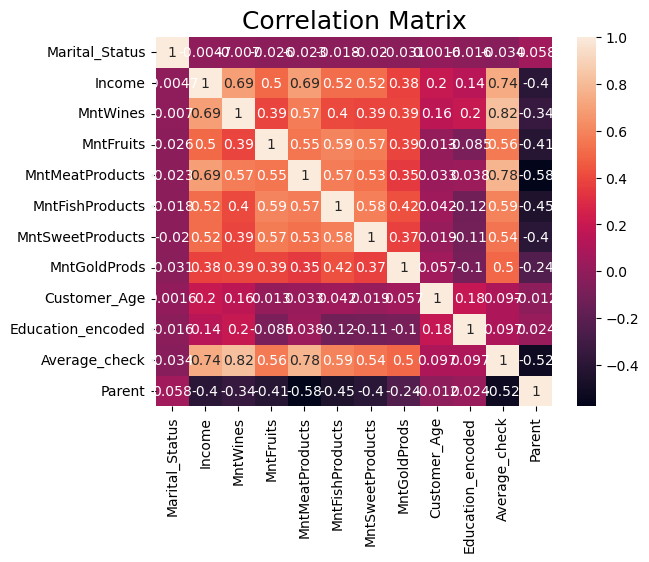

In [188]:
sns.heatmap(data2_corr.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [189]:
data2['Total_campaigns'] = data2['AcceptedCmp1'] + data2['AcceptedCmp2'] + data2['AcceptedCmp3'] + data2['AcceptedCmp4'] + data2['AcceptedCmp5']
data2['Total_campaigns'].tail()

2235    0
2236    1
2237    1
2238    0
2239    0
Name: Total_campaigns, dtype: int64

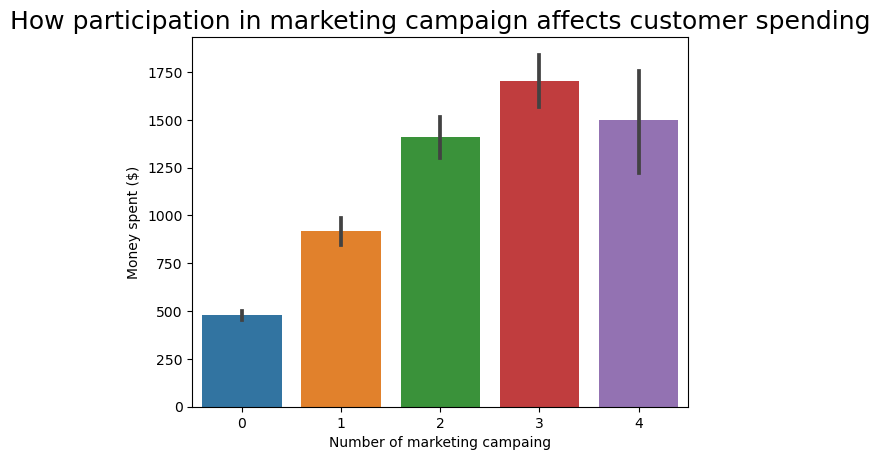

In [190]:
sns.barplot(x="Total_campaigns", y="MntTotal", data=data2)
plt.title("How participation in marketing campaign affects customer spending",fontsize=18)
plt.ylabel('Money spent ($)')
plt.xlabel('Number of marketing campaing')
plt.show()

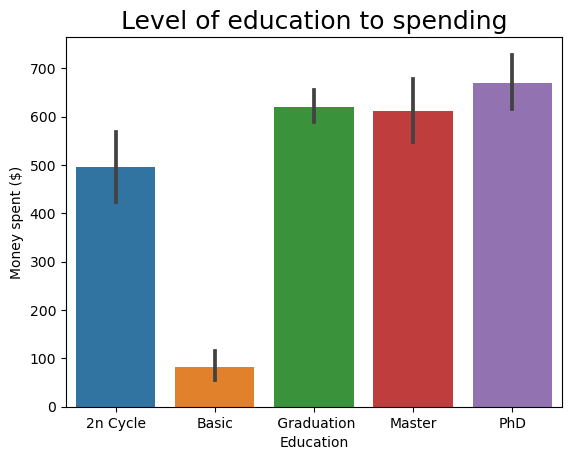

In [191]:
ticks = ['2n Cycle', 'Basic',' Graduation', 'Master','PhD']
ax = sns.barplot(x="Education_encoded", y="MntTotal", data=data2)
ax.set_xticklabels(ticks)
plt.title('Level of education to spending', fontsize=18)
plt.ylabel('Money spent ($)')
plt.xlabel('Education')
plt.show()


## Clustering (KMeans)

In [192]:
data2.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0    04/09/12       58       635  ...              3         11         1   
1    08/03/14       38        11  ...              3         11         0   
2    21/08/13       26       426  ...              3         11         0   
3    10/02/14       26        11  ...              3         11         0   
4    19/01/14       94       173  ...              3         11         0   

   Customer_Age  Education_encoded  MntTotal  Total_transactions  \
0            66                  2      1617                  22   
1            69                  2        27                   4   
2            58                  2       776                  20   
3            39                  2        53                   6   
4            42                  4       422                  14   

   Average_check  Parent  Total_campaigns  
0          73.50       0                0  
1           6.75       1                0  
2          38.80       0                0  
3           8.83       1                0  
4          30.14       1                0  

[5 rows x 36 columns]

In [193]:
data2_features = data2.drop(columns=['ID','Year_Birth','Education','Dt_Customer','Z_CostContact','Z_Revenue','Average_check'], axis=1)
data2_features.head()

Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0               0  58138.0        0         0       58       635         88   
1               0  46344.0        1         1       38        11          1   
2               1  71613.0        0         0       26       426         49   
3               1  26646.0        1         0       26        11          4   
4               1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Response  Customer_Age  Education_encoded  \
0             0         0         1            66                  2   
1             0         0         0            69                  2   
2             0         0         0            58                  2   
3             0         0         0            39                  2   
4             0         0         0            42                  4   

   MntTotal  Total_transactions  Parent  Total_campaigns  
0      1617                  22       0                0  
1        27                   4       1                0  
2       776                  20       0                0  
3        53                   6       1                0  
4       422                  14       1                0  

[5 rows x 29 columns]

In [194]:
data2_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marital_Status       2235 non-null   int64  
 1   Income               2235 non-null   float64
 2   Kidhome              2235 non-null   int64  
 3   Teenhome             2235 non-null   int64  
 4   Recency              2235 non-null   int64  
 5   MntWines             2235 non-null   int64  
 6   MntFruits            2235 non-null   int64  
 7   MntMeatProducts      2235 non-null   int64  
 8   MntFishProducts      2235 non-null   int64  
 9   MntSweetProducts     2235 non-null   int64  
 10  MntGoldProds         2235 non-null   int64  
 11  NumDealsPurchases    2235 non-null   int64  
 12  NumWebPurchases      2235 non-null   int64  
 13  NumCatalogPurchases  2235 non-null   int64  
 14  NumStorePurchases    2235 non-null   int64  
 15  NumWebVisitsMonth    2235 non-null   i

In [195]:
data2_features
scaled_features = StandardScaler().fit_transform(data2_features.values)
scaled_features_data2 = pd.DataFrame(scaled_features, index=data2_features.index, columns=data2_features.columns)
scaled_features_data2.head()

Marital_Status    Income   Kidhome  Teenhome   Recency  MntWines  \
0       -1.347168  0.288875 -0.825249 -0.931004  0.306848  0.982790   
1       -1.347168 -0.261951  1.032185  0.905531 -0.383827 -0.871358   
2        0.742298  0.918211 -0.825249 -0.931004 -0.798232  0.361769   
3        0.742298 -1.181926  1.032185 -0.931004 -0.798232 -0.871358   
4        0.742298  0.296114  1.032185 -0.931004  1.550064 -0.389993   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0   1.553679         1.697766         2.460429          1.474919  ...   
1  -0.636615        -0.717004        -0.650509         -0.631791  ...   
2   0.571823        -0.175917         1.344151         -0.147490  ...   
3  -0.561088        -0.654399        -0.504112         -0.583361  ...   
4   0.420768        -0.216163         0.154675         -0.002199  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Customer_Age  \
0     -0.262424     -0.116642 -0.095023  2.385711      1.016430   
1     -0.262424     -0.116642 -0.095023 -0.419162      1.272803   
2     -0.262424     -0.116642 -0.095023 -0.419162      0.332769   
3     -0.262424     -0.116642 -0.095023 -0.419162     -1.290927   
4     -0.262424     -0.116642 -0.095023 -0.419162     -1.034554   

   Education_encoded  MntTotal  Total_transactions    Parent  Total_campaigns  
0          -0.353368  1.681795            1.311823 -1.585607        -0.438477  
1          -0.353368 -0.961874           -1.187331  0.630673        -0.438477  
2          -0.353368  0.283477            1.034139 -1.585607        -0.438477  
3          -0.353368 -0.918644           -0.909648  0.630673        -0.438477  
4           1.429427 -0.305113            0.201088  0.630673        -0.438477  

[5 rows x 29 columns]

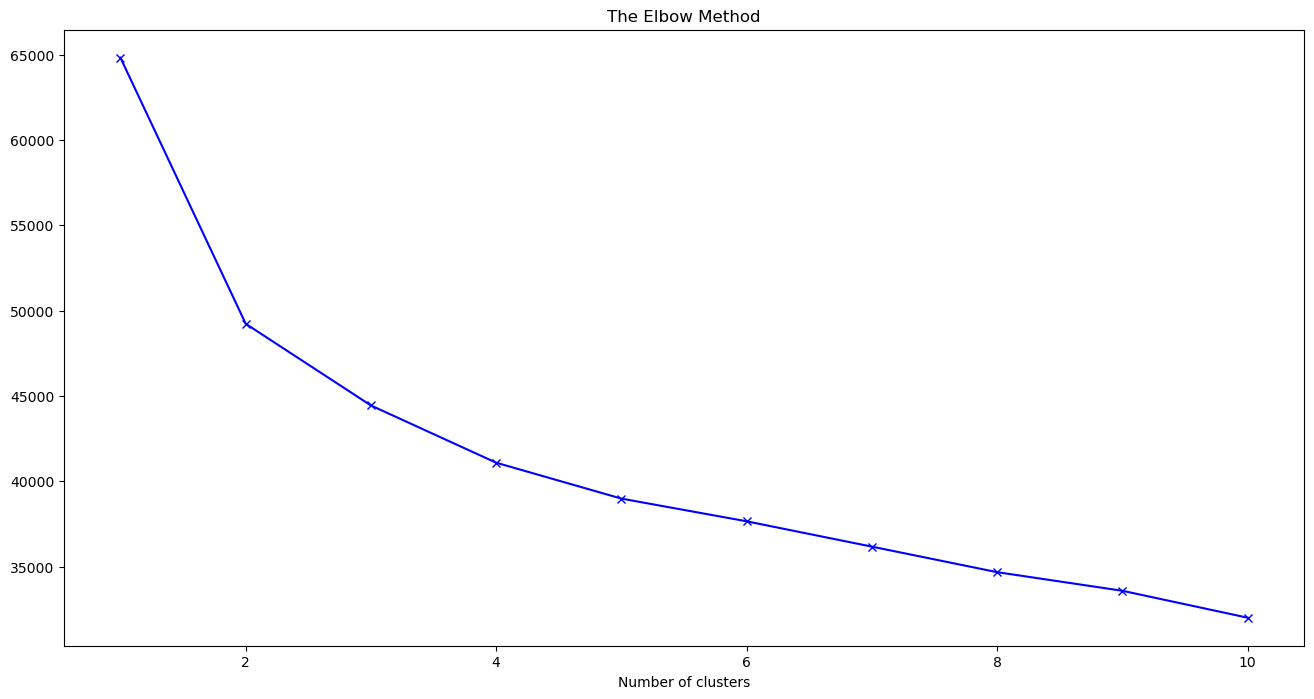

In [196]:
cs=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_features_data2)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,11),cs, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [197]:
# List to store silhouette scores for different number of clusters
silhouette_scores = []

min_clusters = 2
max_clusters = 10

for n_clusters in range(min_clusters, max_clusters+1):
    # create a K-means model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_features_data2) 
    # predict the cluster labels for the data
    cluster_labels = kmeans.predict(scaled_features_data2)
    # calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(scaled_features_data2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the index of the maximum silhouette score
optimal_index = np.argmax(silhouette_scores)
# Add 2 to the index to get the optimal number of clusters
optimal_num_clusters = optimal_index + 2

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 2


In [198]:
kmeans=KMeans(n_clusters=optimal_num_clusters).fit(scaled_features_data2)
pred=kmeans.predict(scaled_features_data2)

data2['Cluster'] = pred

data2.head(10)

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   
5  7446        1967      Master               1  62513.0        0         1   
6   965        1971  Graduation               0  55635.0        0         1   
7  6177        1985         PhD               1  33454.0        1         0   
8  4855        1974         PhD               1  30351.0        1         0   
9  5899        1950         PhD               1   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  Customer_Age  \
0    04/09/12       58       635  ...         11         1            66   
1    08/03/14       38        11  ...         11         0            69   
2    21/08/13       26       426  ...         11         0            58   
3    10/02/14       26        11  ...         11         0            39   
4    19/01/14       94       173  ...         11         0            42   
5    09/09/13       16       520  ...         11         0            56   
6    13/11/12       34       235  ...         11         0            52   
7    08/05/13       32        76  ...         11         0            38   
8    06/06/13       19        14  ...         11         1            49   
9    13/03/14       68        28  ...         11         0            73   

   Education_encoded  MntTotal  Total_transactions  Average_check  Parent  \
0                  2      1617                  22          73.50       0   
1                  2        27                   4           6.75       1   
2                  2       776                  20          38.80       0   
3                  2        53                   6           8.83       1   
4                  4       422                  14          30.14       1   
5                  3       716                  20          35.80       1   
6                  2       590                  17          34.71       1   
7                  4       169                   8          21.12       1   
8                  4        46                   5           9.20       1   
9                  4        49                   1          49.00       1   

   Total_campaigns  Cluster  
0                0        0  
1                0        1  
2                0        0  
3                0        1  
4                0        1  
5                0        0  
6                0        0  
7                0        1  
8                0        1  
9                1        1  

[10 rows x 37 columns]

In [199]:
# count of records that falls into each cluster
data2['Cluster'].value_counts()

1    1343
0     892
Name: Cluster, dtype: int64

## Clustering visualisation

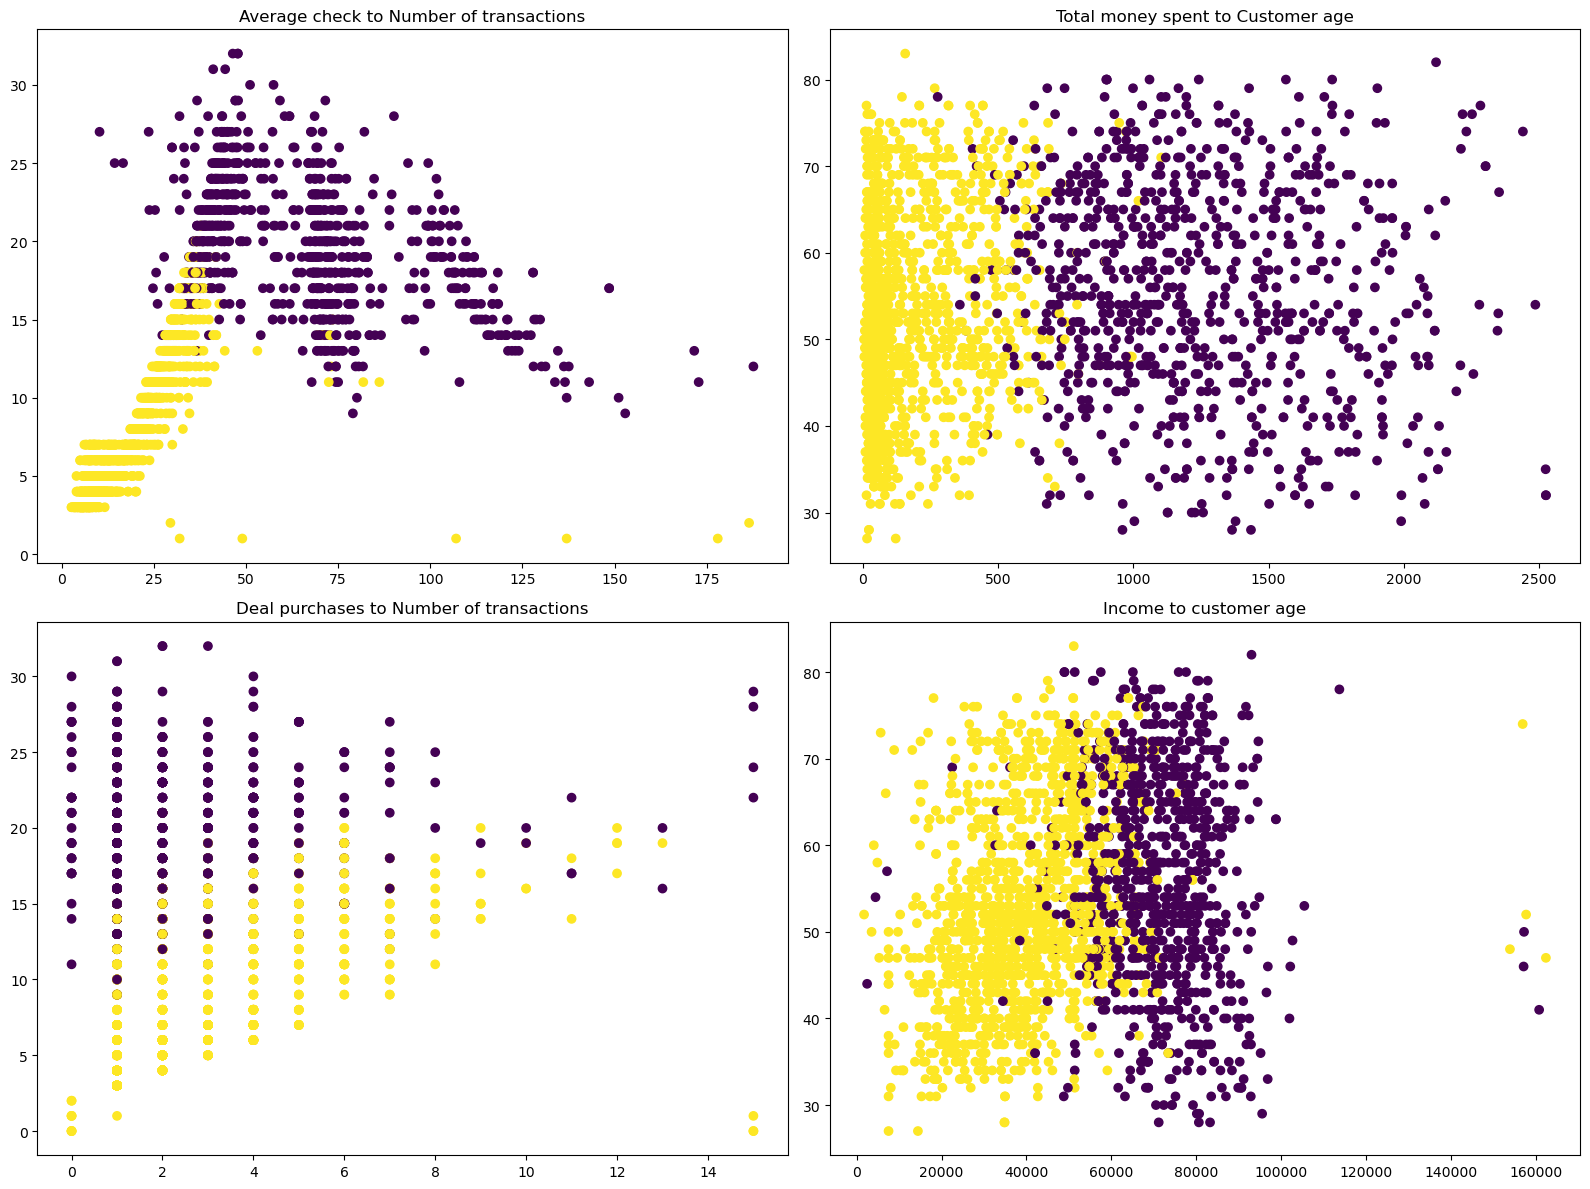

In [201]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot 1
axs[0, 0].scatter(data2['Average_check'], data2['Total_transactions'], c=data2['Cluster'])
axs[0, 0].set_title('Average check to Number of transactions')

# Scatter plot 2
axs[0, 1].scatter(data2['MntTotal'], data2['Customer_Age'], c=data2['Cluster'])
axs[0, 1].set_title('Total money spent to Customer age')

# Scatter plot 3
axs[1, 0].scatter(data2['NumDealsPurchases'], data2['Total_transactions'], c=data2['Cluster'])
axs[1, 0].set_title('Deal purchases to Number of transactions')

# Scatter plot 4
axs[1, 1].scatter(data2['Income'], data2['Customer_Age'], c=data2['Cluster'])
axs[1, 1].set_title('Income to customer age')

plt.tight_layout()
plt.show()

## PCA

In [296]:
scaled_features_data2.shape

(2235, 29)

In [297]:
from sklearn.decomposition import PCA

In [298]:
pca = PCA(n_components=5)
pca.fit(scaled_features_data2)

PCA(n_components=5)

In [299]:
# transform data
x_pca = pca.transform(scaled_features_data2)

In [300]:
x_pca.shape

(2235, 5)

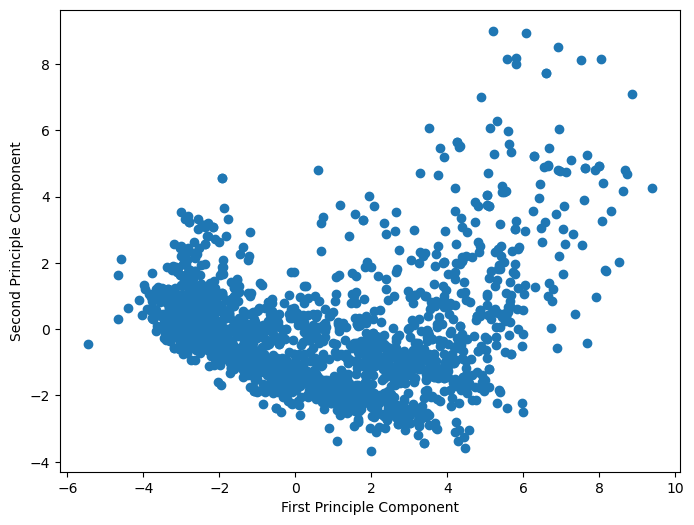

In [301]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

In [302]:
# pca components
pca.n_components_

5

In [303]:
# explianed variance
pca.explained_variance_ratio_

array([0.30957685, 0.08990154, 0.08341253, 0.05147526, 0.04200633])

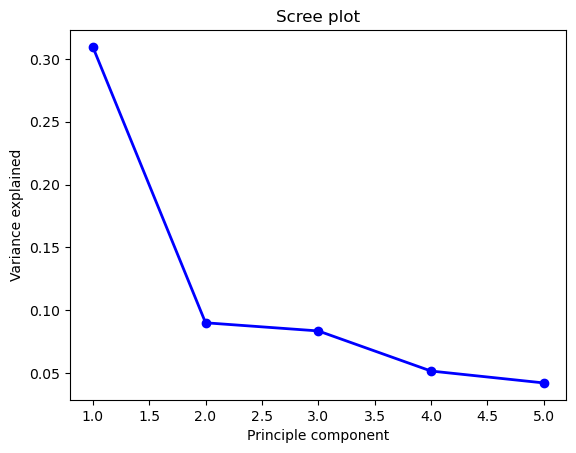

In [304]:
# scree plot
pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values,pca.explained_variance_ratio_ ,'o-',linewidth =2,color = 'blue')
plt.title("Scree plot")
plt.xlabel("Principle component")
plt.ylabel("Variance explained")
plt.show()

In [305]:
# from graph we will select 2 components,and by using we will build PCA again

In [306]:
pca_new = PCA(n_components=2)
pca_new.fit(scaled_features_data2)
# transform data
x_pca_new = pca_new.transform(scaled_features_data2)
x_pca_new.shape

(2235, 2)

## Hierarchical lustering

In [ ]:
# normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns = data.columns)
data_scaled.head()

## Conclusion
The simple split of the given group of customers into 2 clusters proved to be actually insightful.  
The first cluster (labeled as 0) consists of the less active customers. Here some important characteristics of the customers in the first cluster:
- They are on average younger (52yo)
- Their reported income averages around $39k
- Less active, with only average 7 transactions for last 2 years
- Only around 10% of them participating in promotional campaigns for last 2 years
- They are slightly more likely to leave a complain.
- Most of them have kids in the household

In comparison here are characteristics of the customers in the second cluster:
- Average age is 56yo
- Income statistics shows the average of $71k
- Activity trend shows the average 19 transactions per customer. With minimum of 9 transaction in the whole cluster.
- 60% of those customers participated in at least one marketing campaigns
- Less likely to leave a complain. 

Additionally, it is noticable that some features do not significantly change between those clusters, such as Marital_Status, Recency, NumDealsPurchases, Membership_years. Which tells us it does not matter when the customer obtained a store membership, nor when was their last purchase, nor if they are single or have a partner, nor how likely they purchase a deal products, it does not describe how active this customer is.  

Although there is a clear chain of dependencies, such as higher education level leading to higher salary and increased purchasing activity, it is interesting to note that K-means clustering was able to split the customers into two clusters with distinct characteristics, as described above. This indicates that there are additional factors influencing customer behavior and preferences beyond the direct dependencies mentioned. The clustering algorithm likely captured these additional factors, resulting in the formation of two distinct clusters with unique characteristics.